# NumPy (Numeric Python)

**Python** – довольно простой, понятный язык программирования, однако **Python** обеспечивает низкую скорость обработки числовых массивов данных. В эпоху *big data*, при работе с огромными массивами данных даже небольшое отставание языка программирования по скорости становится заметно и критично. Конечно, есть языки программирования, которые работают намного быстрее (например, **С++**), но они гораздо сложнее в написании и неинтерпретируемые, а компилируемые (то есть, в *jupyter notebook'е* с такими языками работать не получилось бы). 

Как же найти компромисс простоты и скорости работы?<br> Ответ прост: написать **Python**-библиотеку для работы с массивами данных, функции которой будут написаны на **С**, но которую можно было бы использовать из **Python**. Эта библиотека называется **NumPy** (НамПай).


**NumPy** (сокращение от «*Numerical Python*») – модуль, предоставляющий:
* мощный инструмент для представления N-мерных массивов,
* набор математических операций над массивами и матрицами,
* операции линейной алгебры, преобразование Фурье и генератор случайных чисел,
* средства для сохранения и загрузки массивов,
* средства для интеграции с кодом **C/C++** и Fortran.

Преимущества **NumPy**:
* высокооптимизированный код на **C++**,
* поддержка векторных операций,
* обход ограничений **Python**, т.е. настоящая многопоточность без *GIL (Global interpreter lock),*
* хранение данных в низкоуровневом представлении (строго типизированный массив **C**, а не объекты питона),
* продуманный интерфейс для работы с большими массивами данных.


Тот факт, что код **NumPy** написан на **С++**, накладывает некоторые ограничения на массивы этой библиотеки: в любом **numpy**-массиве могут храниться элементы только одного типа: например, только *float* или только *string*.

Как правило, название **Numpy** сокращают до **np**:

In [1]:
import numpy as np  
import matplotlib.pyplot as plt

## Одномерный массив `np.ndarray`


### Создание `np.ndarray` по данным из Python


Как же завести массив в **Numpy**?

Просто! Например, можно просто перевести обычный список **Python** (`list`) в `np.ndarray` используя функцию `np.array()`, которая позволяет создать массив c данными из различныи объектов (список, кортеж, словарь, ...). <br>
Чтобы преобразовать **Python** `list` в `np.ndarray`, нужно обернуть массив в `np.array()`:

In [ ]:
a = np.array([1, 2, 3])
print(a)
print(f'type(a) = {type(a)}')

### Наиболее важные атрибуты объектов ndarray:


**ndarray.ndim** - размерность массива (часто ассоциируют с числом "осей").

**ndarray.shape** - размеры массива. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из *n* строк и *m* столбов, `shape` будет *(n,m)*. Число элементов кортежа `shape` равно `ndim`.

**ndarray.size** - количество элементов массива. Равно произведению всех элементов атрибута `shape`.

**ndarray.dtype** - тип элементов массива. Можно определить `dtype`, используя стандартные типы данных Python. NumPy здесь предоставляет большой набор возможностей, как встроенных, например: `bool_, character, int8, int16, int32, int64, float8, float16, float32, float64, complex64, object_`, так и возможность определить собственные типы данных, в том числе и составные.

**ndarray.itemsize** - размер каждого элемента массива в байтах.

In [ ]:
a.dtype

Преобразуем тип данных массива *a* из `np.int64` в `np.float32`, используя `astype()`:

In [ ]:
a = a.astype(np.float32)
a.dtype

Так же тип можно указать вручную. Это позволяет уменьшить размеры массива и увеличить производительность.

In [ ]:
a = np.array([1, 2, 3])
print('Размер массива a:', a.nbytes, 'байта')

b = np.array([1, 2, 3], dtype=np.int8)
print('Размер массива b:', b.nbytes, 'байта')

с = np.array([3, 4 ,1], dtype=np.int64)
print('Размер массива с:', с.nbytes, 'байта')


### Изменение массивов `np.ndarray`

Как и `list`, массивы `np.ndarray` - изменяемые объекты. Механика изменений значений в них такая же, как `list`-ов. Убедимся в этом, изменив первый элемент массива *a*:

In [2]:
a = np.array([3, 4 ,1])

a[1] = 3
print(a)

[3 3 1]


Нюанс при замене в массиве элемента одного типа на элемент другого типа: <br> **новый элемент будет приведен к типу данных этого массива**:





In [3]:
a = np.array([3, 4 ,1], dtype=np.int64)

# Значение 3.5 будет приведено к типу int64, т.е. станет 3
a[1] = 3.5
print(a)

[3 3 1]


**Обратите внимание**: если создается `np.ndarray` с данными разных типов, `int` и `float`, например, то все числа будут приведены к более точному типу, т.е. `float`.

Таким образом, 1 в примере ниже из целого числа преобразуется в *вещественное число:*

In [4]:
a = np.array([3., 4. ,1])
print(a)

[3. 4. 1.]


Значение 5 будет приведено к типу float64, т.е. станет 5. :

In [5]:
a[1] = 5
print(a)

[3. 5. 1.]


In [6]:
a = np.array([1, 2, 3])  # Самый "объемный" элемент - int
print(a, 'тип:', a.dtype)

b = np.array([1, 2.5, 3])  # Самый "объемный" элемент - float
print(b, 'тип:', b.dtype)

c = np.array([1., 2+1j, 3])  # Самый "объемный" элемент - сomplex
print(c, 'тип:', c.dtype)

[1 2 3] тип: int64
[1.  2.5 3. ] тип: float64
[1.+0.j 2.+1.j 3.+0.j] тип: complex128


Добавить в конец массива `np.ndarray` новый элемент чуть сложнее, чем у `list`. Напримним, в `list` это делалось с помощью метода `.append()`. В *numpy* это также делается с помощью `append()`, но немного по-другому. 


In [7]:
a = np.array([3, 4 ,1])

# Так применяется append(), результаты сохраняем в переменную а
a = np.append(a, 6)

a

array([3, 4, 1, 6])

**Обратите внимание**: в *numpy* при `np.append()` не происходит добавление элемента в уже существующий массив, а создается новый массив. Поэтому результаты применения `np.append()` необходимо сохранить в переменную. 

Такое поведение характерно для функций "изменяющих" `np.ndarray()`: удаление элементов `np.delete()`, вставка элементов `np.insert()`, ... . Эти функции не изменяют сам массив, а возвращают новый массив, в котором выполнены заданные действия.


In [8]:
a = np.arange(10)  # Аналог range(), только возвращает np.ndarray 
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`np.delete()` без сохранения результатов и с сохранением:

In [9]:
np.delete(a, [5, 7])
print(f'результаты удаления не сохранились. a={a}')

a = np.delete(a, [5, 7])
print(f'результаты удаления сохранились. a={a}')


результаты удаления не сохранились. a=[0 1 2 3 4 5 6 7 8 9]
результаты удаления сохранились. a=[0 1 2 3 4 6 8 9]


In [10]:
a = np.insert(a, 2, [0, 0])
print(a)

[0 1 0 0 2 3 4 6 8 9]


In [11]:
a = np.append(a, [1, 2, 3])
print(a)

[0 1 0 0 2 3 4 6 8 9 1 2 3]


### Объединение массивов np.concatenate()



Вместо `np.append()` можно использовать **np.concatenate((a1, a2, ..., aN), axis=0)** соединяет указанные массивы *a1, a2, ..., aN* вдоль указанной оси `axis`.

**!!!Важно**, что **(a1, a2, ..., aN)** - пишется как *кортеж* в скобках () или как *список* в []: **[a1, a2, ..., aN]**

Параметры:

- **a1, a2, ..., aN** - последовательность подобно массиву объектов. Любые *объекты*, которые могут быть преобразованы в *массивы* NumPy. Эти *объекты* должны иметь одинаковое количество осей.
- **axis** - целое число (необязательный). Определяет ось вдоль которой соединяются массивы. По умолчанию axis=0, что соответствует первой оси.

Возвращает:
    **ndarray** - массив **NumPy**. Массив который состоит из указанных массивов, соединенных вдоль указанной оси.

Рассмотрим **примеры** конкатенации списков:

In [12]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[0, 0]])
c = np.array([[0], [0], [0]])
a, b, c

(array([[1, 2],
        [3, 4],
        [5, 6]]),
 array([[0, 0]]),
 array([[0],
        [0],
        [0]]))

In [34]:
np.concatenate([a, b])

ValueError: ignored

In [14]:
np.concatenate([a, c], axis = 1)

array([[1, 2, 0],
       [3, 4, 0],
       [5, 6, 0]])

## Задача 1. 

Требуется получить и вывести результаты каждого пункта:
1.   Создайте одномерный `np.ndarray()` *my_arr_1* из 5 любых разных целых чисел. Выведите массив целиком и его 2 элемент. 
2.   Получите характеристики (наиболее важные атрибуты) *my_arr_1*.
3.   Тип данных в *my_arr_1* преобразуйте в `np.float`.
4.   Добавьте и разместите в *my_arr_1* новый любой элемент по индексу 2.
5.   Удалите из *my_arr_1* элемент с индексом 5.
6.   Получите *my_arr_2* путем объединения *my_arr_1* и *my_arr_1*

In [ ]:
# Напишите свой код в данной ячейке

[Посмотреть ответ на задачу](#no_1)

## Многомерные массивы `np.ndarray`

Мы узнали, как создавать и изменять одномерные массивы, как они выглядят в numpy и нюансы приведения типов. Настало время познакомиться с **многомерными массивами.**

**Многомерный массив** - это *массив*, элементы которого тоже *массивы*. В принципе, ничего нового, все как и у `list`.

In [ ]:
two_dim_array = np.array([[1, 2], [3, 4]])

print(two_dim_array)

В **многомерном массиве** (как и в **одномерном**) все элементы имеют одинаковый тип.<br>
Убедимся в этом. В примере ниже 2 и 3 будут приведены к типу числа 5., т.е. к *float64*:

In [ ]:
a = np.array([[2, 3], [4, 5.]])
print(a, a.dtype)

Обращение элементу `a[i, j]`, где `i, j` - индексы по первой и второй размерности (оси) массива

In [ ]:
a[1,0]

## Операции над массивами



### Арифметические операции над массивами

In [ ]:
a = np.array([2, 5, 6, 7])
b = np.array([1, 7, 8, 1])

In [ ]:
print(a + b)

In [ ]:
print(a - b)

In [ ]:
print(a * b)

In [ ]:
print(a / b)

In [ ]:
print(a ** 2)

Один из операндов может быть скаляром, а не массивом:

In [15]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [16]:
print(a + 1)
print(2 * a)

[[2 3]
 [4 5]
 [6 7]]
[[ 2  4]
 [ 6  8]
 [10 12]]


Упрощение записи:

In [ ]:
a += 1
print(a)

Деление на 0 возбуждает *исключение*, а не *ошибку* и возвращает бесконечность `np.inf`:

In [ ]:
np.array((1))/0 

В **Numpy** также существует объект *неопределенность* `np.nan`.<br> 
Примеры с `np.nan` и `np.inf`:

In [ ]:
np.nan + 1, np.inf + 1, np.inf * 0, 1. / np.inf

 ### Универсальные функции `ufunc`

**Универсальные функции** применяются к массивам *поэлементно*:





In [ ]:
np.sin, type(np.sin)

In [ ]:
print(np.sin(a))
print(np.cosh(a))

In [ ]:
# Еще примеры:
print(np.sqrt(b))
print(np.exp(b))
print(np.log(b + 1))
print(np.sin(b))

print(f'экпонента np.e = {np.e}, число Пи np.pi: {np.pi}')

### Сравнения

Сравнения возвращают булевы массивы:

In [ ]:
print(a > b)

In [ ]:
print(a < b)

In [ ]:
print(a == b)

In [17]:
c = a > 5
print(c)

[[False False]
 [False False]
 [False  True]]


### Кванторы "существования" и "всеобщности":

In [ ]:
c = np.array([False, True,  True,  True])

np.any(c), np.all(c)

### Характеристики массивов

In [ ]:
print(f"""Для массива b
cумма всех элементов b.sum() = {b.sum()},
произведение всех элементов массива b.prod() = {b.prod()},
максимальный  элемент b.max() = {b.max()},
минимальный элемент b.min() = {b.min()}, 
среднее значение b.mean() = {b.mean()},  
среднеквадратичное отклонение b.std() = {b.std()}""")

Пример: сгенерируем массив из 1000 *нормально распределенных чисел*, найдем среднее значение и среднеквадратичное отклонение: 

In [20]:
x = np.random.normal(size=1000)
x.mean(), x.std()

(0.036377299004912815, 1.0185187665390143)

### Кумулятивные (частичные) суммы:

In [18]:
print(b)
print(b.cumsum())

[[0 0]]
[0 0]


### Сортировка массивов

Функция `np.sort()` возвращает отсортированную копию, а метод `sort()` сортирует сам массив.

In [19]:
print(f'b={b}')
print(f'np.sort(b)={np.sort(b)}')
print(f'b={b}')

b=[[0 0]]
np.sort(b)=[[0 0]]
b=[[0 0]]


In [ ]:
b.sort()
print(b)

### Объединение и расщепление массивов

Объединение массивов "*по горизонтали*" (horizontal stack).

In [21]:
a = np.array([1, 2, 3])
b = np.array([100, 200, 300])

print(np.hstack((a, b)))

[  1   2   3 100 200 300]


Объединение массивов "*по вертикали*" (vertical stack).

In [22]:
print(np.vstack((a, b)))

[[  1   2   3]
 [100 200 300]]


Для трехмерных массивов определены аналогичные функции np.dstack и np.dsplit. Для работы с массивами большей размерности необходимо применять функции np.stack и np.split с указанием оси.

Расщепление массива в позициях 2 и 5.

In [ ]:
a = np.random.random(10)
np.hsplit(a, [2, 5])

### Обращение к элементам массивов:

Создаем массив из 11 чисел, которые равномерно разделяют отрезок [0, 1]:

In [23]:
a = np.linspace(0, 1, 11)
print(a)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [24]:
b = a[2]  # Обращение к элементу по индексу
print(b)

0.2


In [25]:
b = a[2:6]  # Получение элементов массива с индексами из отрезка [2, 5]
print(b)

[0.2 0.3 0.4 0.5]


In [ ]:
b[0] = -0.2  # Изменение элемента с заданым индексом
print(b)

In [26]:
# С шагом 2 выведем элементы с номерами из диапазона [0, 9]:
b = a[1:10:2]
print(b)

[0.1 0.3 0.5 0.7 0.9]


Перебор элементов массива *mas*: <br>
`mas[start:end:step]`, где <br>
`start` - *индекс* первого элемента. Если `start` не указан, то он по умолчанию равен 0. <br>
*Индекс* последнего выводимого элемента `end - 1`. Если `end` не указан, то выводятся все элементы, начиная с индекса `start`; <br>
`step` - шаг, с которым изменяется *индекс* при получении элементов массива. Если `step` не указан, то по умолчанию равен 1.

Рассмотрим примеры:

In [ ]:
print(a)
print(a[1::2])
print(a[:6:2])
print(a[::2])


In [ ]:
print(a)
b[0] = -0.1
print(a)

Такой результат вызван тем, что `b` является ссылкой на срез `a` (`b = a[1:10:2]`).

Можно получить *элементы массива* в обратном порядке. Для этого задается отрицательное значение шага `step`:

In [ ]:
b = a[len(a):0:-1]
print(b)

Элемент массива a изменяется и в таком случае :

In [ ]:
print(a)
b = a[:]
b[1] = 0.1
print(a)

Можно задать список индексов:

In [ ]:
print(a[[2, 3, 5]])

### Пример создания и применения маски:

In [27]:
b = a > 0  # Массив, являющийся маской
print(a)
print(b)
print(a[b])  # Выведем те значения из a, которым соответствует True в маске b 

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[False  True  True  True  True  True  True  True  True  True  True]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


###  Атрибуты многомерных массивов

In [ ]:
arr = np.array((
    (1, 2, 3, 4),
    (5, 6, 7, 8)
))
print(f'arr =\n{arr}')
print('Количество измерений:', arr.ndim)
print('Форма массива (количество элементов в каждом измерении):', arr.shape)
print('Общее количество элементов:', arr.size)
print('Тип элементов:', arr.dtype)
print('Размер элемента:', arr.itemsize, 'байт')

print(a)

Атрибуту `shape` можно присвоить новое значение - кортеж размеров по всем осям. В результате массива примет новую форму, а данные не изменятся.

In [ ]:
a = np.array([[0.0, 1.0], [-1.0, 0.0]])
b = np.linspace(0, 3, 4)
print(b)

Получим форму *b*:

In [ ]:
b.shape

Изменим форму *b*:

In [ ]:
b.shape = 2, 2
print(b)

Используя метод `ravel()`, можно *b* растянуть в одномерный массив:

In [ ]:
print(b.ravel())

### Арифметические операции поэлементные

In [28]:
b = np.array([[3, 4], 
    [8, 6 ]])
print(b)

[[3 4]
 [8 6]]


In [30]:
a

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [29]:
a + 1

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [ ]:
a * 2

In [ ]:
a + [0, 1]  # Второе слагаемое дополняется до матрицы копированием строк

In [31]:
a + np.array([[0, 2]]).T  # .T - транспонирование

array([[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       [2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]])

In [ ]:
a + b

Поэлементное и матричное умножение:

In [ ]:
print(a)
print(b)

Поэлементное умножение задается с помощью оператора `*`

In [ ]:
print(a * b)  

**Матричное умножение **задается с помощью оператора `@` или путем вызова `np.dot()`:

In [ ]:
print(a @ b)  # Матричное умножение

In [ ]:
np.dot(a, b)  # Матричное умножение (можно и так)

## Задача 2. 

Требуется получить и вывести результаты каждого шага:
1. Используя `np.array()`, cоздать многомерный `np.ndarray` *my_arr3* заполненный целыми числами, у которого размер первой оси равнен 2, размер второй оси - 4.
2. Вывести элемент *my_arr3* с индексами 1 и 2 по первой и второй оси соответственно.
3. Вывести все элементы *my_arr3* с индексами 2 и 3 по второй оси.
4. Создать маску для получения всех отрицательных чисел из *my_arr3* и найти их сумму 
5. Увеличить все значения в *my_arr3* на 1, результат сохранить в *my_arr4*
6. Получить объединение массивов *my_arr3* и *my_arr4* "*по вертикали*".



In [ ]:
# Напишите свой код в данной ячейке

[Посмотреть ответ на задачу](#no_2)

## Генерация массивов






Функции, создающие массивы, в основном позволяют указать тип (`dtype`) и форму (`shape`) генерируемого массива.
**NumPy** также позволяет создавать ряд стандартных массивов:

`np.zeros(n, m)` - генерирует нулевую матрицу указанного размера (в примере ниже 3 * 5):

In [ ]:
np.zeros((3, 5), dtype=np.int)  # 3 - количество строк (первая ось), 5 - количество столбцов (вторая ось)

`np.zeros(n, m)` - генерирует матрицу, заполненную единицами указанного размера (в примере ниже 2 * 3 * 5):

In [ ]:
np.ones((2, 3, 4)) # Это - трехмерный массив размером (2, 3, 4), т.е. 2 массива по 3 массива (3 строки) по 4 элемента (4 столбца)

`np.full((n, m), k)` - генерирует матрицу размером n*m, заполненную элементами `k`:

In [ ]:
np.full((5, 3), 7)

В случае создания **очень** больших массивов, заполнение их значениями может занимать значительное время. Если достаточно только зарезервировать место под массив, который будет заполнен позже, можно воспользоваться функцией `np.empty()`. Получившийся массив будет заполнен данными из оперативной памяти:

In [ ]:
np.empty((2, 2), dtype=np.int) 

Функция `np.eye()` создает массив, содержащий единичную матрицу:

In [ ]:
np.eye(5)

Функция `np.diag()` созадет массив, содержащий диагональную матрицу.

In [ ]:
np.diag([1, 2, 3, 4, 5])

In [ ]:
np.diag([1, 2, 3], k=2) # k - смещение от главной диагонали

Функция `np.fromfunction()` позволяет сгенерировать массив заданной формы из результатов заданной пользователем функции `fun()`. Функция многократно вызывется с координатами текущей заполняемой ячейки.

In [ ]:
def fun(i, j):
    return (i+1)*(j+1)

np.fromfunction(fun, (9, 9))

## Генерация случайных данных

Модуль `np.random` обладает большим количеством функций для *генерации случайных данных*:

In [ ]:
np.random.rand(5,3)  # Равномерное распределение [0, 1)

In [ ]:
np.random.randint(0, 6, (5,3))  # Равномерное распределение целых числел [0, 6)

In [ ]:
np.random.randn(5,3)  # Стандартное нормальное распределение Ex=0, σ²=1

In [ ]:
np.random.normal(5, 3, (5,3))  # Нормальное распределение Ex=5, σ²=3

In [ ]:
np.random.exponential(2, size=(5,3))  # Экспоненциальное распределение, λ = 2

In [ ]:
np.random.poisson(5, size=(5,3))  # Распределение Пуассона, λ = 5

Так же возможна генерация более специфических распределений.

## Генерация интервалов
Следующие функции создают *одномерные массивы* из чисел в определенном *интервале*.

`np.arange()` генерирует `np.ndarray`, в остальном аналогична **генератору** `range` из стандартной библиотеки **Python**:

In [ ]:
np.arange(4)  # start=0, stop=4, step=1

In [ ]:
np.arange(3, 6)  # start=3, stop=6, step=1

In [ ]:
np.arange(1, 11, 2) # start=1, stop=11, step=2

Для той же цели можно использовать объект `np.r_` или `slice`-нотацию.

Объект `np.r_` соединяет последовательности вдоль первой оси. 


In [ ]:
np.r_[[1, 2, 3], [3, 2, 1]]

In [ ]:
np.r_[1:11:2]

Рассмотрим строку 'Python', в которой символам y, t соответсвуют индексы (1, 3). Функция `slice(start, end, step)` возвращает объект (слайс), описывающий *индексы элементов* в массиве.

In [ ]:
pyString = 'Python'

sObject = slice(1, 5, 2)
print(f'sObject = {sObject}')
print(f'pyString[sObject]={pyString[sObject]}')

`np.linspace()` создает массив заданной длины, содержащий равномерно распределенные числа из указанного интервала:

In [ ]:
np.linspace(start=0, stop=1, num=11)

In [ ]:
np.linspace(3, 6, 6)

`np.logspace()` используется для создания логорифмически распределенных *интервалов*.

In [ ]:
np.logspace(0, 3, 4, base=10)

На этом перечень основных способов создания массивов подходит к концу. Еще больше специализированных функций можно найти в [документации NumPy](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html).

## Работа с массивами

Обратите внимание: большинство операций **не** *модифицируют* массив, а *создают новую копию*. Зачастую это все равно быстрее вычислений над списками в **Python**, но для оптимизации можно использовать модифицирующие операторы:

In [ ]:
print(arr)  # массив не изменился
arr = arr + 1  # массив изменился с созданием временной копии
print(arr)
arr -= 1  # массив изменился без создания копии (наиболее оптимальный способ)
print(arr)

Логические операции так же выполняются *поэлементно*:

In [ ]:
arr = np.random.randint(-5, 6, (3,3))
print(arr)
print(arr >= 0)

In [ ]:
np.diff(arr, axis=0)  # Находит разницу между подрядидущими элементами (по столбцам, т.к. axis=0) 

Множество других функций и набор необходимых констант доступны под общепринятыми названиями. За полным списком можно обратиться к [документации NumPy](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)

### np.vectorize()

Использовать эти функции с массивами **numpy** крайне удобно. Если вы хотите добавть поддержку массивов **NumPy** в уже существующую функцию, то можно воспользоваться `np.vectorize()`

In [ ]:
def func(el):  # Эта функция действует только на 1 элемент.
    if el > 5:
        return el - 6
    else:
        return -1 * el

v_func = np.vectorize(func)  # А эта - поддерживает работу с массивами numpy
print(v_func(arr))

Если в аргументе `otypes` функции `np.vectorize()` можно передавать тип выходных значений. Если этого не делать, то фукция будет выполнена лишний раз, для того чтобы интерприатор понял какого типа выходные значения

In [ ]:
def fun1(el):  # Эта функция действует только на 1 элемент.
    print(1)
    if el > 5:
        return el - 6
    else:
        return -1 * el

v_fun1 = np.vectorize(fun1)  # А эта - поддерживает работу с массивами numpy
print(v_fun1([1,2]))

Вывод трех единиц указывает на то что функция выполнилась лишний раз. Лишнего прохождения можно избежать, если сразу задать *тип значения* на выходе, напрнимер, otypes=[float]:

In [ ]:
def fun1(el): # Эта функция действует только на 1 элемент.
    print(1)
    if el > 5:
        return el - 6
    else:
        return -1 * el

v_fun1 = np.vectorize(fun1, otypes=[float]) # А эта - поддерживает работу с массивами numpy
print(v_fun1([1,2]))

### Базовая индексация массивов

Индексация массивовов в **NumPy** - крайне мощный инструмент. Начнем с простого:

In [ ]:
arr = np.arange(1, 13).reshape((3,4))
print(arr)

Для обычного индексирования можно применять следующие способы:

In [ ]:
print(arr[1][2])
print(arr[1, 2])

Второй способ предпочтительнее, так как первый ведет к созданию промежуточной копии строки массива:

In [ ]:
t = arr[1]
print('Промежуточная копия:', t)
print('Искомое значение:', t[2])

Как и в питоне, возможно использование нарезки массивов (`slice`).

`slice` - 0-3 чисел, разделенные 1-2 `:`.
В общем виде `slice a:b:c` означает:
* `a` - начало промежутка. Если пусто - подразумевается 0.
* `b` - конец промежутка. Если пусто - подразумевается "до конца массива".
* `c` - шаг промежутка. Если пусто - подразумевается 1 (берем каждый элемент).

Отрицательные позиции `a` и `b` обозначают отсчет от конца массива. Отрицательный шаг `с` означает проход в обратном направлении (от `b`-го индекса к `a`-му).

In [ ]:
print(arr)
print(arr[0:2, 1:3])  # Получает строки 0:2 (т.е. 0 и 1) и столбцы 1:3 (т.е. 1 и 2)

In [ ]:
arr[::2, 1::2]  # Берем каждую 2 строку от начала до конца строк, каждый 2 столбец начиная со столбца с индексом 1

Конечно, помимо *индексации* элементов, возможно *изменение их значений*:

In [ ]:
print(arr)
arr[1,2] = 99
print(arr)

### Продвинутая индексация массивов


В качестве индекса **NumPy** также поддерживает использование булевых массивов, совпадающих по размеру с индексируемым массивом (масок).
Самый простой способ создать маску - проведение операций сравнения.

In [ ]:
arr = np.arange(15).reshape((3,5))
arr -= 7
print(arr)

Найдем все отрицательные числа в массиве:

In [ ]:
mask = arr < 0
print(mask)

Получим соответствующие маске значения:

In [ ]:
arr[mask] # обратите внимание, форма массива при этом теряется

Этот **метод индексации** также поддерживает *модификацию* значений массива. Для примера умножим на `-1` все отрицательные числа:

In [ ]:
print(arr)
arr[mask] *= -1
print(arr)

Над булевыми массивами определены *логические операции*. Это позволяет нам создавать сложные условия:

In [ ]:
print('Исхдный массив:', arr)

mask = ((arr > 2) & (arr < 5)) | ((arr > 5) & (arr < 8))
print('Маска:', mask)

arr[mask] = 0
print('Результат:', arr)

Последний метод *индексации*, который мы рассмотрим - **индексация по координатам**:

In [ ]:
arr = np.arange(15).reshape((3,5))
print(arr)

Используя функцию `np.nonzero()`, найдем координаты элементов массива, кратных 3:

In [ ]:
coords = np.nonzero(arr%3 == 0)
print('Координаты в виде, удобном NumPy (массив из координат x, массив из координат y):', coords)

print('Координаты в виде, удобном нам:', np.transpose(coords))  # np.transpose - выполняет объединение в новые массивы соотвествующих элементов в заданных масивах 

Полученный массив из координат можно применять для индексации:

In [ ]:
arr[coords] = 0
print(arr)

Индексировать массивы **NumPy** можно и с помощью **tuple** или **list** языка **Python**:

In [ ]:
arr[ ( [1]*3 , list(range(1,4)) ) ] = 9
print(arr)

Для создания масок и индексации массивов иногда удобно использовать `np.mgrid`.<br> Пример использования:

In [ ]:
np.mgrid[0:4, 1:3]

## Logical operations

**logical_and**(x1, x2, /[, out, where, …])  # Применяет поэлементно логическое И(x1, x2)

**logical_or**(x1, x2, /[, out, where, casting, …])  # Применяет поэлементно логическое ИЛИ(x1, x2)

**logical_not**(x, /[, out, where, casting, …])  # Применяет поэлементно логическое отричание НЕ(x)

**logical_xor**(x1, x2, /[, out, where, …])  # Применяет поэлементно сложение по модулю 2  XOR(x1, x2)

Примеры:

In [ ]:
np.logical_and(True, False)

In [ ]:
np.logical_and([True, False], [False, False])

In [ ]:
x = np.arange(5)
np.logical_and(x>1, x<4)

## numpy.where(condition[, x, y]) -  
в зависимости от того выполнено ли условие *condition* выбирается элемент из* x* или из* y*. Если *x*, *y*  не заданы, то возвращает индексы элементов, для которых условие выполняется.

In [32]:
arr_wh = np.arange(10)
print(arr_wh)
np.where(arr_wh < 5, arr_wh, 10*arr_wh)

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

In [ ]:
np.where(arr_wh < 5)

### Манипуляция массивами

Для выбора из различных величин и их преобразованию согласно нескольким условиям удобно использовать функцию `np.select(condlist, choicelist, default=0)`, алгоритм работы которой: <br>
в `condlist` указаны условия для проверки и указан массив, из которого берутся элементы;<br>
в `choicelist`,  указаны действия которые нужно произвести в случае выполнения соответствующего условия;<br>
`default` - элемент, на который заменяются элементы входного массива, для которых не выполнено ни одно условие.

In [ ]:
# Пример 1:
x = np.arange(8)
condlist = [x<3, x>4]
choicelist = [x, x**2]
np.select(condlist, choicelist)

In [33]:
# Пример 2:
x = np.r_[-2:4]  # Получим [-1 0 1 2 3]
print('x=', x)
print(np.select([x >= 2, x >= 0],[x+3, x+2]))   # [-1 0 1 2 3] -> [0 2 3 5 6]; -1->0, 0->2, ...
print(np.select([x >= 0, x >= 2],[x+3, x+2]))   # [-1 0 1 2 3] -> [0 3 4 5 6]; -1->0, 0->3,..

x = np.r_[-2:3]
print('\nx=', x) # array([-2, -1,  0,  1,  2])
print(np.select([x > 3, x >= 0],[0, x+2])) # [0 0 2 3 4]

x= [-2 -1  0  1  2  3]
[0 0 2 3 5 6]
[0 0 3 4 5 6]

x= [-2 -1  0  1  2]
[0 0 2 3 4]


### np.bincount(x, weights=None, minlength=0) -
вектор, элементы которого соотвествуют количеству вхождений каждого элемента массива в этот массив. Важно заметить, что элементы `x` должны быть неотрицательными.

In [ ]:
np.bincount(np.arange(5))
# 0 вошел 1 раз, 1 - 1 раз, 2 - 1 раз, ..... :

In [ ]:
np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))
# 0 вошел 1 раз, 1 - 3 раза, 2 - 1 раз, ..... :

## np.argmax(mas,axis=None, out=None)


Возвращает *индекс наибольшего элемента* из элементов вдоль указанной оси (axis). Параметры:

- mas - Входной массив
- axis - int, optional. Если индекс не задан или используется значение по умолчанию, то функцией возвращается индекс наибольшего элемента в одномерном массиве, полученном их исходного, иначе возвращается индекс по указанной оси.
- out - Выходной массив, optional. Название массива для сохранения результата.

In [ ]:
a = np.arange(6).reshape(2,3) + 10
a

In [ ]:
np.argmax(a)

In [ ]:
np.argmax(a, axis=0)

In [ ]:
np.argmax(a, axis=1)

## np.argmin(a, axis=None, out=None)


Аналогично `np.argmax()`

In [ ]:
np.argmin(a)

Дополнительные функции манипуляции массивами доступны в [документации NumPy](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).

## Задача 3. 

Требуется получить и вывести результаты каждого шага:

1. Создать двумерный `np.ndarray` *my_arr*: <br>
[[ 1  2  3 4  5] <br>
 [ 0 -1  6  0 -2]] 
2. Получить из *my_arr* элементы, которые больше 1 и меньше 4 одновременно.
3. Сделать перобразвание элементов *my_arr*: те элементы *my_arr*, которые меньше нуля, заменить на ноль, и удвоить все нечетные элементы, которые больше нуля.
4. Получить индексы наименьших элементов *my_arr* вдоль оси `axis=1`.



In [ ]:
# Напишите свой код в данной ячейке

[Посмотреть ответ на задачу](#no_3)

## Специфические компоненты NumPy

### Матрицы

Для работы с матрицами можно использовать класс np.matrix, в котором операция умножения реализуется как матричное умножение.

In [ ]:
np.matrix(b) * np.matrix(a)  

Единичная матрица:

In [ ]:
I = np.eye(4)
print(I)

Метод reshape делает то же самое, что присваивание атрибуту shape.

In [ ]:
print(I.reshape(16))

In [ ]:
print(I.reshape(8, 2))

Подматрица.

In [ ]:
I[0:2, 1:3]

Сумма всех элементов; суммы столбцов; суммы строк.

In [ ]:
print(b.sum())
print(b.sum(axis=0))
print(b.sum(axis=1))

Аналогично работают max, min и т.д.

In [ ]:
print(b.max())
print(b.max(axis=0))
print(b.min(axis=1))

**След** - сумма диагональных элементов матрицы.

In [ ]:
np.trace(a)

Для *двухмерных массивов* определен метод транспонирования `.T`. Массивы могут выступать в роли матриц, например, при использовании оператора матричного умножения `@`.

In [ ]:
arr1 = np.ones((2,4))*2
arr2 = np.ones((2,4))*3

print(arr1.T)
print(arr2)
print(arr1.T @ arr2)

Однако для полноценной работы с матрицами стоит использовать объекты `np.matrix`:

In [ ]:
arr1 = np.eye(3, dtype=int)
print(arr1)

mat1 = np.asmatrix(arr1)
print(mat1)

Объект `np.matrix` основан на `np.array`, но ведет себя сообразно математическим матрицам и векторам.

In [ ]:
vector = np.asmatrix([1, 2, 1]).T

print(vector)

print(mat1+vector)

print(mat1*vector)

У матриц определен ряд полезных операций:

In [ ]:
mat = mat1+vector
print(mat)

print(mat.I)  # Обратная матрица
print(mat.T)  # Транспонированная матрица
print(mat.A)  # Соответствующий матрице массив

### Импорт/экспорт данных

**NumPy** позволяет сохранять и открывать данные в различных форматах. Первая группа функций служит для сохранения данных в человекочитаемом формате и для интеграции с другими программами:
* `np.savetxt()` - сохраняет данные в файл (.csv, .txt, ...) 
* `np.loadtxt()` - загружает данные из файла (.csv, .txt,...)
* `np.genfromtxt()` - загружает данные из файла (.csv, .txt,...), поддерживает более сложные форматы и тонкие настройки

поработаем с файлом на диске. Необходимо задать путь до файла *test.txt.
*   Если работаете не в Google Colaboratory, то обращаетесь к файлам на своем жестком диске, например, посредством модуля `os`.
*   Если используте Google Colaboratory, то нужно выполнить:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')  
gc_folder = r"/content/gdrive/My Drive/Colab Notebooks/"  # Стандартный путь до файлов на диске google.colab

Модифицируем стандартный путь так, чтобы обратиться к файлу. 
Отредактируйте эту строку так, чтобы в `gc_folder` содержался полный путь до папки, в которой будут храниться файлы:

In [ ]:
gc_folder += r'КУРС Python для анализа данных/files/'  

Далее необходимо дополнить путь gc_path так, чтобы получить точный путь до файла на вашем Google Disk, например, так:

In [ ]:
test1 = np.eye(4)  # Создаем единичную матрицу

np_test_path = gc_folder + 'np_test.txt'  # Путь до np_test.txt

# Сохраняем единичную матрицу в файл np_test.txt на диске
np.savetxt(np_test_path, test1)
with open(np_test_path) as f:
    print('np_test.txt:', f.read())
    
np.savetxt(np_test_path, test1, fmt='%.2e', header='Header', footer='Footer', delimiter=',')
with open(np_test_path) as f:
    print('np_test.txt:', f.read())
    
test2 = np.loadtxt(np_test_path, delimiter=',')
print ('test == test2:', np.all(test1 == test2))

test3 = np.genfromtxt(np_test_path, delimiter=',', skip_header=1)
print ('test == test3:', np.all(test1 == test3))

Вторая группа функций служит для сохранения данных для последующей обработки в **NumPy**. Эти функции сохраняют данные в оптимизированном двоичном представлении для быстрого сохранения и загрузки:
* `np.save` - сохраняет массив в файл
* `np.savez` - сохраняет несколько массивов в файл
* `np.savez_compressed` - сохраняет несколько массивов в сжатый файл
* `np.load` - загружает данные из файла, сохраненного при помощи вышеперечисленных комманд

In [ ]:
test1 = np.eye(4)
file_path = gc_folder + 'np_test.npy'
np.save(file_path , test1)

test2 = np.load(file_path )
print(np.all(test1 == test2))

### Работа с полиномами
Для представления полиномов используется `np.poly1d()`:

In [ ]:
poly = np.poly1d([1,2,3])
print(poly)
print('\n')
print(poly*poly)
print('\n')

print(poly.integ())  # Возвращает неопределенный интеграл полинома
print('\n')
print(poly.deriv())  # Возвращает производную полинома



## Линейная алгебра
В модуле `np.linalg` собран ряд алгоритмов линейной алгебры.

### Решение СЛАУ матричным методом

$$
\left\{ 
\begin{array}{c}
2x+5y=1 \\ 
x-10y=3
\end{array}
\right. 
$$



In [ ]:
M = np.array([  # коэфициенты в матрице левой части
    [2,   5],
    [1, -10],
])
V = np.array([  # свободные члены
    1, 
    3,
])
res = np.linalg.solve(M, V)
print(res)

print(f'X = {res[0]}; Y = {res[1]}')

### Определитель матрицы

In [ ]:
print(M)
print(f'det(a)={np.linalg.det(M)}')

#### Обратная матрица.

In [ ]:
a1 = np.linalg.inv(M)
print(a1)

### Нахождение собственных чисел и векторов

In [ ]:
A = np.array([[1, 2], [3, 4]])
la, v = np.linalg.eig(A)
l_1, l_2 = la
print('Собственные числа:', l_1, l_2) 
print('Собственный вектор 1:',v[:, 0])
print('Собственный вектор 2:',v[:, 1])  

### Сингулярное разложение

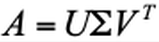

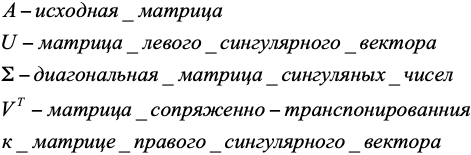

Функция `diagsvd()` находится в пакете `scipy.linalg`. 

In [ ]:
from scipy.linalg import diagsvd

A = np.array([[1,2,3],[4,5,6]])
print(A)
M,N = A.shape
U,s,Vh = np.linalg.svd(A)
Sig = diagsvd(s,M,N)
print('U:', U) 
print('Sig:', Sig)
print('Vh:', Vh)

print('Проверка:') 
print(U.dot(Sig.dot(Vh)))

## Дополнительные опции
NumPy имеет встроенные ограничения на размер выводимых в консоль массивов. Обычно это очень удобно и спасает от ошибочного вывода гигабайтов данных на экран:

In [ ]:
np.arange(100000)

В случае если требуется изменить это ограничение достаточно выполнить
`np.set_printoptions(threshold=XYZ)`, где `XYZ` - новый лимит вывода.
Можно использовать `np.nan` для полного снятия ограничений.

# Ответы на задачи

<a name="no_1"></a>
# Ответ на задачу no_1

In [ ]:
# 1
print('# 1')
my_arr_1 = np.array([1, 0, 5 , -1, 2])
print(my_arr_1)
print(my_arr_1[2])

# 2
print('\n# 2')
print(f'my_arr_1.ndim = {my_arr_1.ndim}') 
print(f'my_arr_1.shape = {my_arr_1.shape}')
print(f'my_arr_1.size = {my_arr_1.size}')
print(f'my_arr_1.dtype = {my_arr_1.dtype}')
print(f'my_arr_1.itemsize = {my_arr_1.itemsize}')

# 3
print('\n# 3')
my_arr_1 = my_arr_1.astype(np.float)
print(f'my_arr_1.dtype)={my_arr_1.dtype}')

# 4
print('\n# 4')
my_arr_1 = np.insert(my_arr_1, 2, -10)
print(f'my_arr_1={my_arr_1}')

# 5
print('\n# 5')
my_arr_1 = np.delete(my_arr_1, 5)
print(f'my_arr_1={my_arr_1}')

# 6
print('\n# 6')
my_arr_2 = np.concatenate([my_arr_1, my_arr_1])
print(f'my_arr_2={my_arr_2}')


<a name="no_2"></a>
# Ответ на задачу no_2

In [ ]:
# 1
print('# 1')
my_arr3 = np.array([[1, 2, -3, 4], [0, -1 , 5, -2]])
print(my_arr3)

# 2
print('\n# 2')
print(my_arr3[1,2])

# 3
print('\n# 3')
print(my_arr3[:,2:])

# 4
print('\n# 4')
print(np.sum(my_arr3[my_arr3 < 0]))

# 5
print('\n# 5')
my_arr4 = my_arr3 + 1
print(my_arr4)

# 6
print('\n# 6')
print(np.vstack((my_arr3, my_arr4)))

<a name="no_3"></a>
# Ответ на задачу no_3

In [ ]:
# 1
print('# 1')
my_arr = np.array([[1, 2, 3, 4, 5], [0, -1 , 3, 0, -2]])
print(my_arr)

# 2
print('\n# 2')
print(my_arr[np.logical_and(my_arr>1, my_arr<4)])

# 3
print('\n# 3')
print(np.select([my_arr < 0, my_arr %2 == 1],[0, 2*my_arr], default=my_arr))  

# 4
print('\n# 3')
print(np.argmin(my_arr, axis=1))